# Project introduction

The COVID-19 pandemic has significantly impacted public discourse, with social media platforms like Twitter becoming a primary outlet for individuals to express their thoughts, opinions, and emotions. Analyzing this vast amount of text data can provide valuable insights into public sentiment and perceptions surrounding the pandemic. This project aims to perform sentiment analysis on a dataset of tweets related to COVID-19. The tweets have been manually tagged with sentiment labels, which will serve as the target for classification. The sentiment classification task involves preprocessing the tweet data, extracting features, and applying machine learning models to predict sentiment categories.

# Project Objectives

    1. Data Preprocessing:
        Clean the raw tweet data by removing unnecessary punctuations, stopwords, and any words with a length of 1 or 2 characters. This ensures the dataset is free from noise and irrelevant words, improving the accuracy of the model.

    2. Visualizing Data:
        Generate a word cloud to visualize the most frequent words in the cleaned dataset. This will help understand the dominant terms being discussed in the tweets related to COVID-19.

    3. Topic Modeling with LDA:
        Apply the Gensim LDA (Latent Dirichlet Allocation) model to extract topics from the tweet corpus. The number of topics will be set to 20, and a visualization will be created to explore the underlying themes in the data. Additionally, an analysis will be performed to determine how many topics are ideal for this dataset.

    4. Sentiment Classification:
        Use the TF-IDF (Term Frequency-Inverse Document Frequency) feature extraction technique along with a Random Forest Classifier to build a model that predicts the sentiment of tweets. This is a multiclass classification problem, and relevant hyperparameters for the classifier will be tuned to optimize performance. The model's precision and recall metrics will be calculated to evaluate its effectiveness.

By achieving these objectives, this project will develop a robust sentiment classification model and explore the thematic structure of COVID-19-related tweets, providing insights into public sentiment during the pandemic.


In [3]:
# Import libraries

from keras.datasets import cifar100
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import RMSprop

In [29]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [31]:
!pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 11.0 MB/s eta 0:00:00


In [32]:
import gensim
from gensim import corpora, models
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [44]:
import string
string.punctuation

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [39]:
stopwords = nltk.corpus.stopwords.words('english')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
import pandas as pd
messages = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CPSC Midterm2/Tweets_Corona_NLP.csv', encoding='latin-1')

In [4]:
messages.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [5]:
messages.shape

(41157, 6)

In [12]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [15]:
messages.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [34]:
# Let's get the length of the messages
messages['length'] = messages['OriginalTweet'].apply(len)
messages.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,length
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,111
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,237
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,131
3,3802,48754,NaN,2020-03-16,My food stock is not the only one which is emp...,Positive,306
4,3803,48755,NaN,2020-03-16,"Me, ready to go at supermarket during the #COV...",Extremely Negative,310


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: ylabel='Frequency'>

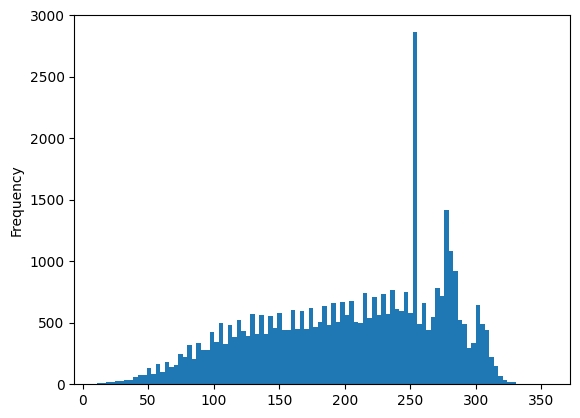

In [35]:
messages['length'].plot(bins=100, kind='hist')

In [36]:
messages.length.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


count    41157.000000
mean       204.200160
std         68.655129
min         11.000000
25%        151.000000
50%        215.000000
75%        259.000000
max        355.000000
Name: length, dtype: float64

In [17]:
print(messages['Sentiment'].value_counts())

Sentiment
Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: count, dtype: int64


<ipython-input-21-237d8f9af770>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=messages, palette='viridis')


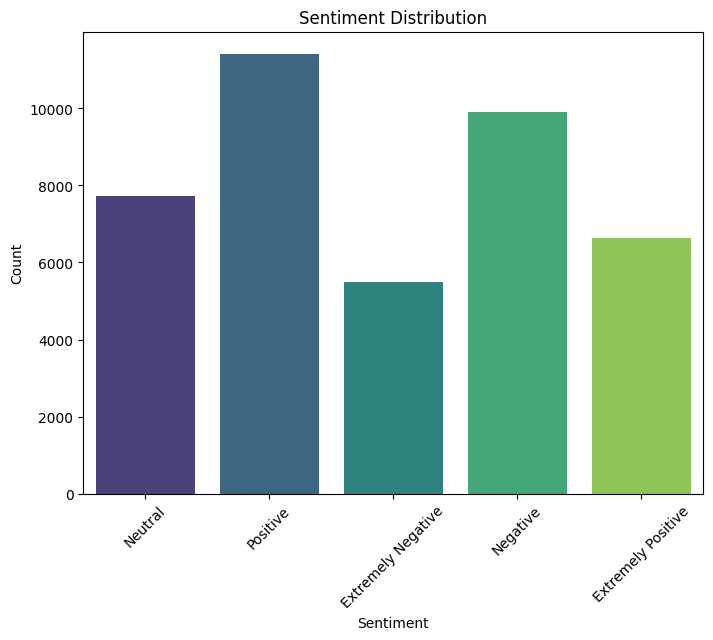

In [21]:
# Bar plot of Sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=messages, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


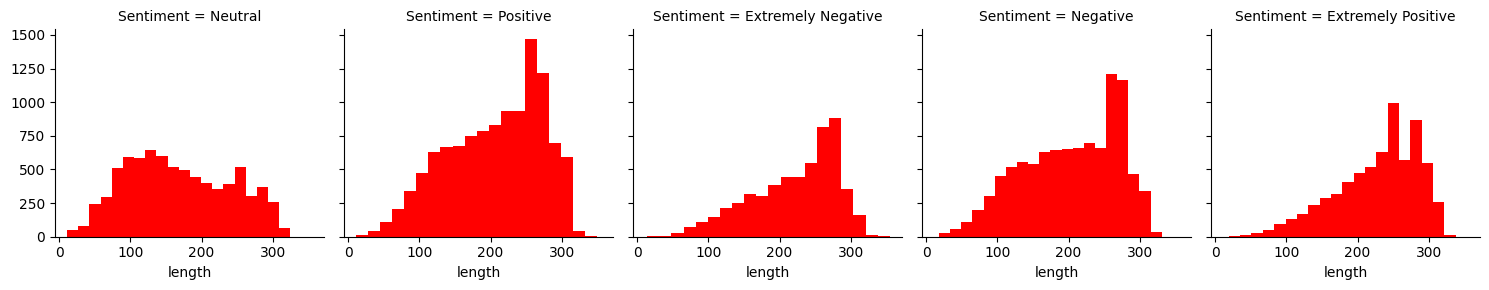

In [37]:
g = sns.FacetGrid(data=messages, col='Sentiment', col_wrap=5)
g.map(plt.hist, 'length', bins = 20, color = 'r')

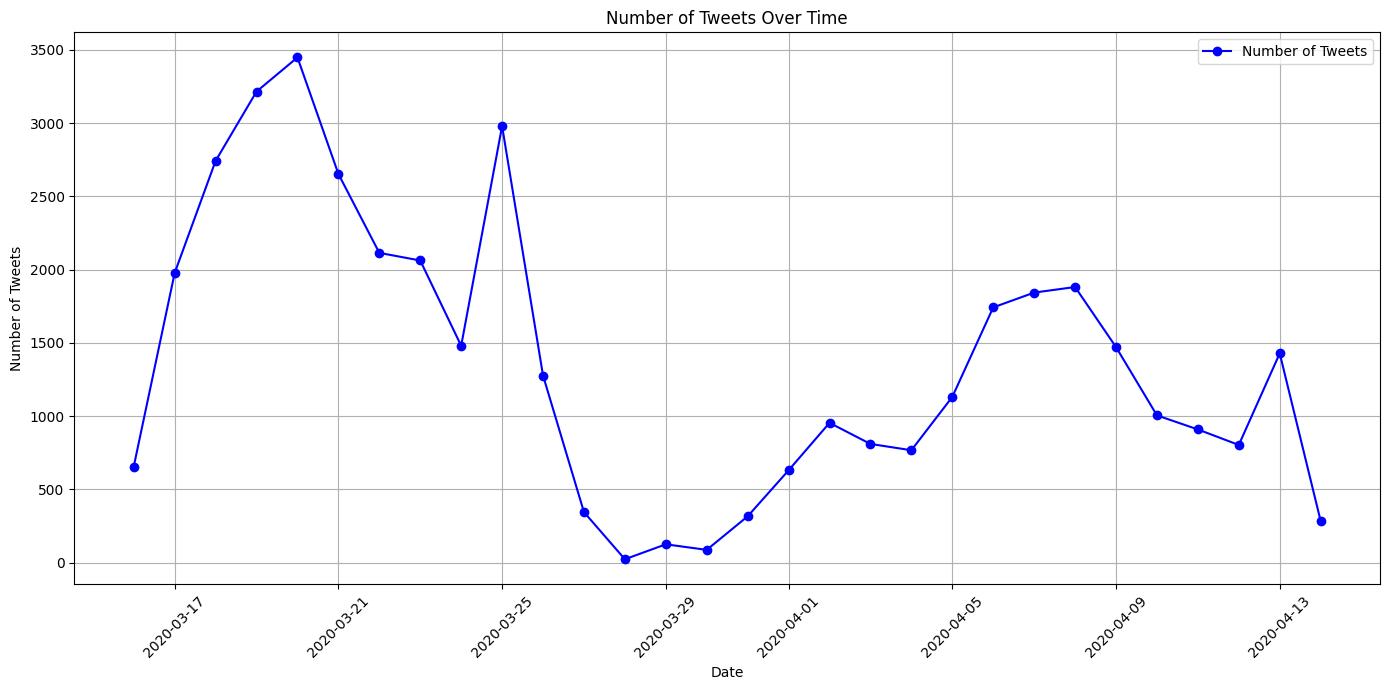

In [28]:
# Convert 'TweetAt' to datetime
messages['TweetAt'] = pd.to_datetime(messages['TweetAt'], format='%d-%m-%Y', errors='coerce')

# Group by date and count tweets per day
tweet_counts = messages.groupby(messages['TweetAt'].dt.date).size()

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(tweet_counts.index, tweet_counts.values, marker='o', linestyle='-', color='b', label='Number of Tweets')
plt.title('Number of Tweets Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

In [47]:
# Properly remove punctuations, stopwords and any words of length 1 or 2.
def message_cleaning(message):
    # Remove punctuation
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed = ''.join(Test_punc_removed)

    # Remove stopwords and filter short words
    Test_punc_removed_clean = [word for word in Test_punc_removed.split()
                               if word.lower() not in stopwords and len(word) > 2]

    return Test_punc_removed_clean

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [48]:
# Let's test the newly added function
df_clean = messages['OriginalTweet'].apply(message_cleaning)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [52]:
print(df_clean[338]) # show the cleaned up version

['COVID19', 'impacting', 'supply', 'chain', 'trade', 'workforce', 'much', 'WeÂ\x92ve', 'put', 'together', 'guide', 'business', 'leaders', 'know', 'Find', 'httpstcotCjOWvB2Y3', 'httpstco9bekwqH0G3']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


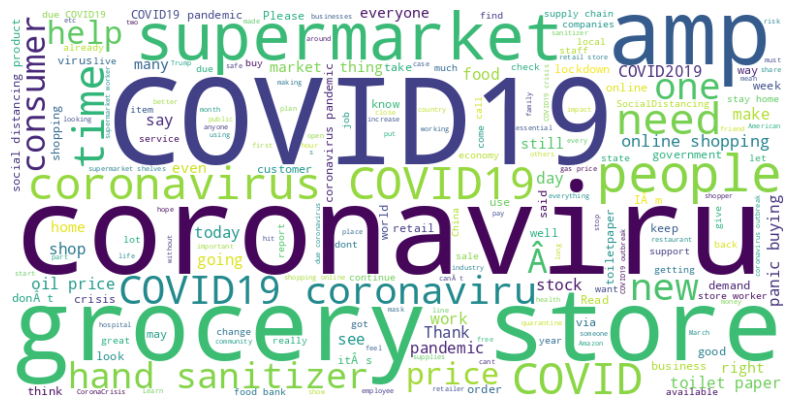

In [57]:
# Get the wordcloud (as mentioned in the code) after applying step 1 and step 2 (This has not been done in the code). [2 Marks]
# Join cleaned tweets into a single string for word cloud generation
cleaned_text = ' '.join(df_clean.explode().dropna())

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cleaned_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


4. Change number of Topics to 20 in the Gensim LDAMulticore and draw the visualisation. Also figure out, about how many topic clusters could be ideal for such application.[3 Marks]



In [60]:

# Train LDA Model with 20 Topics
import gensim
from gensim.models import LdaMulticore
from gensim import corpora
from pprint import pprint

documents = df_clean.tolist()

# Create dictionary and corpus
dictionary = corpora.Dictionary(documents)
corpus = [dictionary.doc2bow(doc) for doc in documents]

# Train LDA model
lda_model = LdaMulticore(corpus=corpus,
                         id2word=dictionary,
                         num_topics=20,
                         passes=10,
                         workers=2)

# Print topics
pprint(lda_model.print_topics())


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.076*"paper" + 0.072*"toilet" + 0.048*"toiletpaper" + 0.036*"coronavirus" '
  '+ 0.012*"Toilet" + 0.011*"roll" + 0.010*"rolls" + 0.008*"Paper" + '
  '0.007*"shortage" + 0.006*"housing"'),
 (1,
  '0.035*"store" + 0.030*"grocery" + 0.026*"supermarket" + 0.025*"coronavirus" '
  '+ 0.012*"people" + 0.010*"Covid19" + 0.010*"COVID19" + 0.009*"like" + '
  '0.009*"get" + 0.008*"going"'),
 (2,
  '0.058*"shopping" + 0.058*"online" + 0.053*"coronavirus" + 0.039*"COVID19" + '
  '0.017*"covid19" + 0.016*"via" + 0.012*"Online" + 0.012*"Grocery" + '
  '0.011*"toiletpaper" + 0.011*"positive"'),
 (3,
  '0.036*"COVID19" + 0.028*"Consumer" + 0.026*"Coronavirus" + 0.011*"amp" + '
  '0.010*"COVID" + 0.009*"Prices" + 0.009*"spread" + 0.008*"prices" + '
  '0.007*"News" + 0.007*"Pandemic"'),
 (4,
  '0.009*"insights" + 0.004*"force" + 0.004*"time" + 0.004*"amp" + '
  '0.004*"Gold" + 0.004*"physical" + 0.004*"complete" + 0.004*"respond" + '
  '0.004*"sharing" + 0.004*"executives"'),
 (5,
  '0.029*"food

In [63]:
# Visualize Topics using pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()
vis_data = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis_data)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


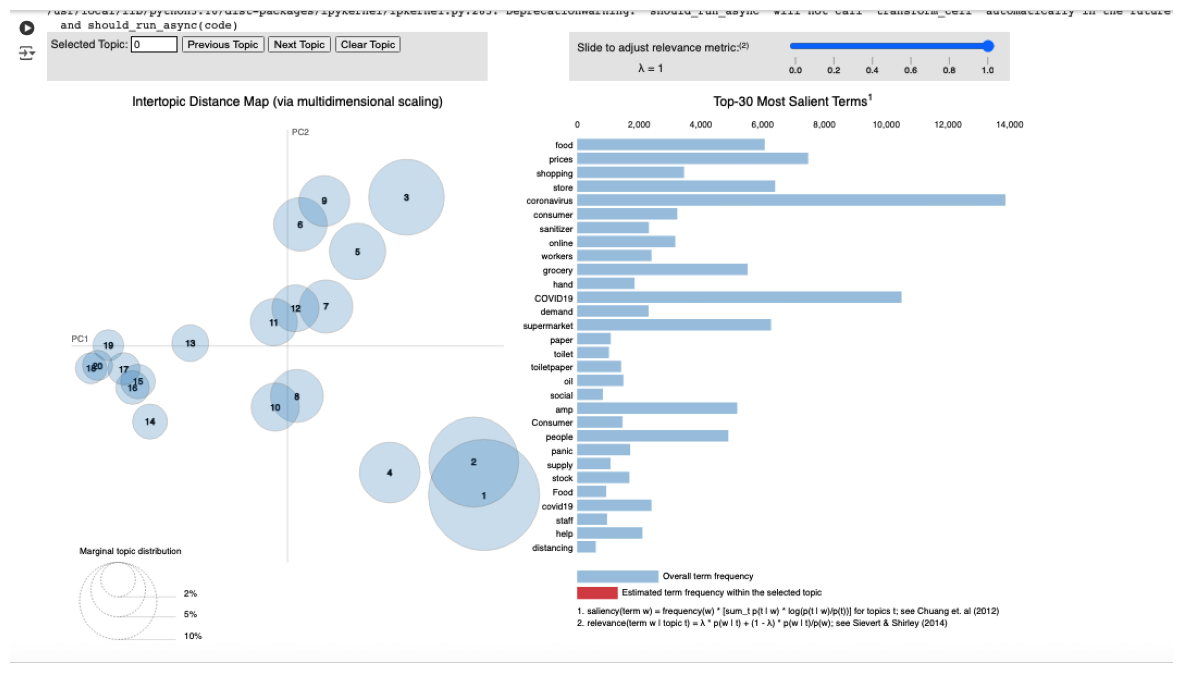

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load image
img = mpimg.imread('pyLDAvis.png')

plt.figure(figsize=(15, 9))  

# Display image
plt.imshow(img)
plt.axis('off')  
plt.show()


In [62]:
# Determine Ideal Number of Topics

from gensim.models import CoherenceModel

# Compute coherence score to evaluate topic model
coherence_model_lda = CoherenceModel(model=lda_model, texts=documents, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()

print(f'Coherence Score: {coherence_lda}')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Coherence Score: 0.42040087414149285


A coherence score of 0.4204 indicates that the topics generated by the LDA model are reasonably coherent, meaning the words that make up each topic are related and make sense together.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Num Topics: 5, Coherence Score: 0.3271
Num Topics: 6, Coherence Score: 0.3136
Num Topics: 7, Coherence Score: 0.3384
Num Topics: 8, Coherence Score: 0.3576
Num Topics: 9, Coherence Score: 0.3557
Num Topics: 10, Coherence Score: 0.3323
Num Topics: 11, Coherence Score: 0.3823
Num Topics: 12, Coherence Score: 0.3989
Num Topics: 13, Coherence Score: 0.3950
Num Topics: 14, Coherence Score: 0.3862
Num Topics: 15, Coherence Score: 0.3319
Num Topics: 16, Coherence Score: 0.3489
Num Topics: 17, Coherence Score: 0.3531
Num Topics: 18, Coherence Score: 0.3486
Num Topics: 19, Coherence Score: 0.3901
Num Topics: 20, Coherence Score: 0.3927


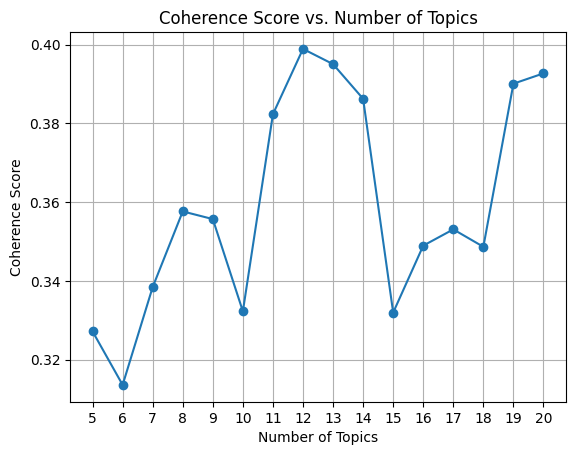

In [66]:
from gensim.models import LdaModel, CoherenceModel
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'documents', 'dictionary', and 'corpus' are defined as per your preprocessing

# Initialize lists to store coherence values and model objects
coherence_values = []
model_list = []

# Set range of topics to evaluate
start_topics = 5
limit_topics = 20
step_topics = 1

# Iterate through different numbers of topics
for num_topics in range(start_topics, limit_topics + 1, step_topics):
    # Train LDA model
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42)

    # Compute coherence score
    coherence_model_lda = CoherenceModel(model=lda_model, texts=documents, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model_lda.get_coherence()

    # Append coherence score and model to lists
    coherence_values.append(coherence_score)
    model_list.append(lda_model)

    print(f"Num Topics: {num_topics}, Coherence Score: {coherence_score:.4f}")

# Plot coherence scores
x = range(start_topics, limit_topics + 1, step_topics)
plt.plot(x, coherence_values, marker='o')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score vs. Number of Topics")
plt.xticks(x)
plt.grid(True)
plt.show()


Peaks around 12 to 14 topics where the coherence scores are relatively high (0.3950 to 0.3989). So, 12 to 14 topics appear to be reasonable candidates for the ideal number of topics for the LDA model

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


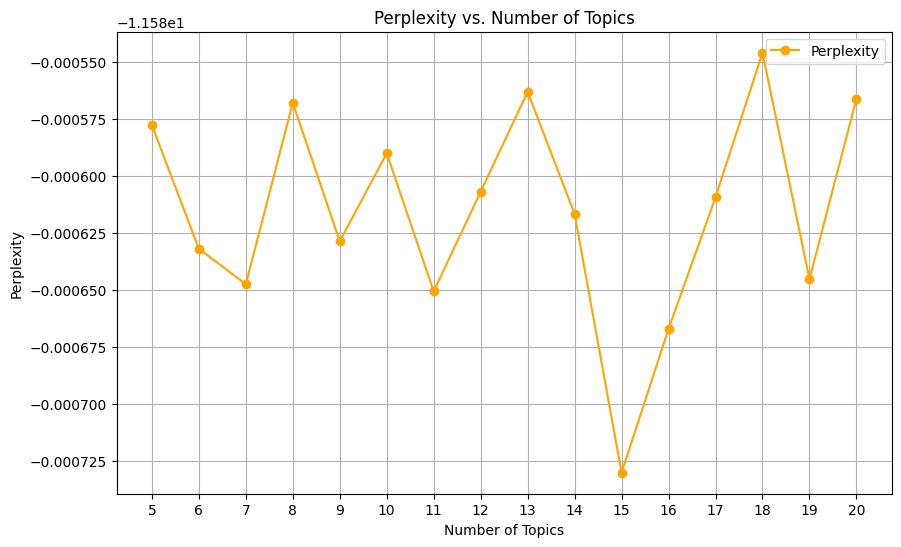

In [67]:
# Plot perplexity
plt.figure(figsize=(10, 6))
plt.plot(x, perplexity_values, label='Perplexity', marker='o', color='orange')
plt.xlabel('Number of Topics')
plt.ylabel('Perplexity')
plt.title('Perplexity vs. Number of Topics')
plt.xticks(x)
plt.legend()
plt.grid(True)
plt.show()

5. Write a complete code using TF-IDF along with Random Forest Classifier to build a Tweet Sentiment classification Model.Use your own discretion to determine the relevant hyperparameters and model parameters. Make sure to provide justification while dropping a column. Remember this is a multiclass classification problem. Give the relevant precision and recall for the model.[5 Marks]

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [5]:
# Dataset: messages

# Define stopwords and initialize punctuation set
punctuation = set(string.punctuation)

# Function to clean text data
def message_cleaning(message):
    # Remove punctuation
    Test_punc_removed = [char for char in message if char not in punctuation]
    Test_punc_removed = ''.join(Test_punc_removed)

    # Remove stopwords and filter short words
    Test_punc_removed_clean = [word for word in Test_punc_removed.split()
                               if word.lower() not in stopwords and len(word) > 2]

    return Test_punc_removed_clean

# Apply text cleaning function to 'OriginalTweet' column
messages['cleaned_text'] = messages['OriginalTweet'].apply(message_cleaning)

# Convert cleaned text into strings
messages['cleaned_text'] = messages['cleaned_text'].apply(lambda x: ' '.join(x))


In [6]:
messages.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,cleaned_text
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,MeNyrbie PhilGahan Chrisitv httpstcoiFz9FAn2Pa...
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice Talk neighbours family exchange phone n...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia Woolworths give elderly ...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,food stock one empty PLEASE dont panic ENOUGH ...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,ready supermarket COVID19 outbreak paranoid fo...


In [7]:

# Count non-null values in each column
count_locations = messages['Location'].value_counts()
print(f"Count of non-null values in Location column: {count_locations}")


Count of non-null values in Location column: Location
London                          540
United States                   528
London, England                 520
New York, NY                    395
Washington, DC                  373
                               ... 
Staffordshire Moorlands           1
Kithchener ON                     1
Tulsa, Ok                         1
Watford, South Oxhey, Bushey      1
i love you so much || he/him      1
Name: count, Length: 12220, dtype: int64


'UserName', 'ScreenName', and 'Location' may not provide meaningful insights into sentiment analysis. Tweets are often public and can come from various users and locations, which might not correlate strongly with sentiment. Sentiment is typically derived from the textual content ('OriginalTweet'), which contains opinions, emotions, or attitudes.

Regarding the 'TweetAt', I will run 2 models to test which one is better. Because during the COVID pandemic, time is sensitive. 

# 1. Model without 'TweetAt'

In [28]:
# Drop any column that is not relevant (for instance, 'UserName', 'ScreenName']
messages.drop(['UserName', 'ScreenName', 'Location', 'TweetAt'], axis=1, inplace=True)

In [29]:
tfidf_vect = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vect.fit_transform(messages['cleaned_text'])

X_features = pd.DataFrame(X_tfidf.toarray())
X_features.head()

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
# Explore RandomForestClassifier Attributes & Hyperparameters¶

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_features,
                                                    messages['Sentiment'],
                                                    test_size=0.2)


In [31]:
# Fit a basic Random Forest model
rf = RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs=-1)
rf_model =rf.fit(X_train, y_train)

In [32]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [33]:
sorted(zip(rf_model.feature_importances_, X_train.columns),reverse =True)[0:10]

[(0.04110103936653989, 3091),
 (0.030031549820130933, 1101),
 (0.02487110555546982, 981),
 (0.023659172295615632, 2020),
 (0.023409842241951667, 2076),
 (0.022267621371561682, 4449),
 (0.020774504313752523, 1964),
 (0.020600715996973763, 2553),
 (0.01886182391290085, 3784),
 (0.017534590567410163, 3813)]

In [38]:
y_pred =rf_model.predict(X_test)
precision, recall, fscore, support = score(y_test, y_pred, average='macro')

In [39]:
# Print precision, recall, and f1-score for each class
print(classification_report(y_test, y_pred))

                    precision    recall  f1-score   support

Extremely Negative       0.78      0.13      0.22      1133
Extremely Positive       0.72      0.26      0.38      1319
          Negative       0.44      0.29      0.35      1951
           Neutral       0.61      0.28      0.38      1536
          Positive       0.34      0.83      0.49      2293

          accuracy                           0.41      8232
         macro avg       0.58      0.36      0.36      8232
      weighted avg       0.54      0.41      0.38      8232



In [40]:
print('Prediction:{} \n Recall:{} \n Accuracy:{}'.format(round(precision, 3), round(recall, 3), (y_pred==y_test).sum()/len(y_test)))

Prediction:0.579 
 Recall:0.358 
 Accuracy:0.41205053449951407


# Improve the model


I want to improve the recall in this case as I want to increase the proportion of actual positive instances (for a given class) that are correctly identified by the model

The imbalance data effect the model performance where the targeted neutral, Extremely Negative, Extremely Positive have smaller value. We will use merge data and use SMOTE to fix this.

Merge Extremely Negative and Negative into 1 column

Extremely Positive and Positive into 1 colum. 

In [41]:
# Mapping dictionary to merge sentiments
sentiment_mapping = {
    'Extremely Negative': 'Negative',
    'Negative': 'Negative',
    'Extremely Positive': 'Positive',
    'Positive': 'Positive',
    'Neutral': 'Neutral'
}

# Apply the mapping to create a new 'Sentiment_Merged' column
messages['Sentiment_Merged'] = messages['Sentiment'].map(sentiment_mapping)

# Print the count of each merged sentiment category
sentiment_counts_merged = messages['Sentiment_Merged'].value_counts()
print(sentiment_counts_merged)

Sentiment_Merged
Positive    18046
Negative    15398
Neutral      7713
Name: count, dtype: int64


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_features,
                                                    messages['Sentiment_Merged'],
                                                    test_size=0.2)

In [44]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter
# Randomly over sample the minority class
smote = SMOTE(random_state=42)
X_train_fit, y_train_fit= smote.fit_resample(X_train, y_train)

# Check the number of records after over sampling
print(sorted(Counter(y_train_fit).items()))

[('Negative', 14362), ('Neutral', 14362), ('Positive', 14362)]


In [46]:
# Fit a basic Random Forest model
rf = RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs=-1)
rf_model =rf.fit(X_train_fit, y_train_fit)



In [51]:
y_pred =rf_model.predict(X_test)
precision, recall, fscore, support = score(y_test, y_pred, average='macro')
# Print precision, recall, and f1-score for each class
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Negative       0.74      0.56      0.64      3060
     Neutral       0.41      0.79      0.54      1488
    Positive       0.78      0.65      0.71      3684

    accuracy                           0.64      8232
   macro avg       0.64      0.67      0.63      8232
weighted avg       0.70      0.64      0.65      8232



The recall has been improved. 

# 2.  Model with 'TweetAt'

In [10]:
# Drop any column that is not relevant (for instance, 'UserName', 'ScreenName', 'Location']
messages_copy.drop(['UserName', 'ScreenName', 'Location', 'OriginalTweet'], axis=1, inplace=True)


In [11]:
# Step 1: Combine 'TweetAt' and 'cleaned_text'
messages_copy['combined_text'] = messages_copy['TweetAt'].astype(str) + ' ' + messages_copy['cleaned_text'].astype(str)

# Step 2: Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Step 3: Fit and transform the combined text
X_tfidf = tfidf_vectorizer.fit_transform(messages_copy['combined_text'])

X_features = pd.DataFrame(X_tfidf.toarray())
X_features.head()

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0.0,0.0,0.0,0.266551,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.037529,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.073523,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.064188,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.061321,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# Explore RandomForestClassifier Attributes & Hyperparameters¶

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_features,
                                                    messages_copy['Sentiment'],
                                                    test_size=0.2)


In [13]:
# Fit a basic Random Forest model
rf = RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs=-1)
rf_model =rf.fit(X_train, y_train)

In [14]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [15]:
sorted(zip(rf_model.feature_importances_, X_train.columns),reverse =True)[0:10]

[(0.05411388669308617, 36),
 (0.03962379700785732, 3108),
 (0.03055755142060666, 3),
 (0.026103790921488665, 2039),
 (0.02525593538354593, 1130),
 (0.024143279786725157, 1008),
 (0.0175155585524133, 1078),
 (0.016853996006550572, 2095),
 (0.01643273998005767, 475),
 (0.01602826248099079, 1847)]

In [16]:
y_pred =rf_model.predict(X_test)
precision, recall, fscore, support = score(y_test, y_pred, average='macro')

In [17]:
# Print precision, recall, and f1-score for each class
print(classification_report(y_test, y_pred))

                    precision    recall  f1-score   support

Extremely Negative       0.70      0.17      0.28      1100
Extremely Positive       0.72      0.22      0.34      1285
          Negative       0.45      0.25      0.32      2014
           Neutral       0.51      0.47      0.49      1516
          Positive       0.35      0.77      0.49      2317

          accuracy                           0.42      8232
         macro avg       0.55      0.38      0.38      8232
      weighted avg       0.51      0.42      0.40      8232



In [18]:
print('Prediction:{} \n Recall:{} \n Accuracy:{}'.format(round(precision, 3), round(recall, 3), (y_pred==y_test).sum()/len(y_test)))

Prediction:0.547 
 Recall:0.378 
 Accuracy:0.4228620019436346


# Improve the model


I want to improve the recall in this case as I want to increase the proportion of actual positive instances (for a given class) that are correctly identified by the model

The imbalance data effect the model performance where the targeted neutral, Extremely Negative, Extremely Positive have smaller value. We will use merge data and use SMOTE to fix this.

Merge Extremely Negative and Negative into 1 column

Extremely Positive and Positive into 1 colum. 

In [19]:
# Mapping dictionary to merge sentiments
sentiment_mapping = {
    'Extremely Negative': 'Negative',
    'Negative': 'Negative',
    'Extremely Positive': 'Positive',
    'Positive': 'Positive',
    'Neutral': 'Neutral'
}

# Apply the mapping to create a new 'Sentiment_Merged' column
messages['Sentiment_Merged'] = messages['Sentiment'].map(sentiment_mapping)

# Print the count of each merged sentiment category
sentiment_counts_merged = messages['Sentiment_Merged'].value_counts()
print(sentiment_counts_merged)

Sentiment_Merged
Positive    18046
Negative    15398
Neutral      7713
Name: count, dtype: int64


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_features,
                                                    messages['Sentiment_Merged'],
                                                    test_size=0.2)

In [21]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter
# Randomly over sample the minority class
smote = SMOTE(random_state=42)
X_train_fit, y_train_fit= smote.fit_resample(X_train, y_train)

# Check the number of records after over sampling
print(sorted(Counter(y_train_fit).items()))

[('Negative', 14386), ('Neutral', 14386), ('Positive', 14386)]


In [22]:
# Fit a basic Random Forest model
rf = RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs=-1)
rf_model =rf.fit(X_train_fit, y_train_fit)



In [23]:
y_pred =rf_model.predict(X_test)
precision, recall, fscore, support = score(y_test, y_pred, average='macro')
# Print precision, recall, and f1-score for each class
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Negative       0.67      0.60      0.64      3049
     Neutral       0.46      0.56      0.50      1523
    Positive       0.69      0.68      0.68      3660

    accuracy                           0.63      8232
   macro avg       0.61      0.61      0.61      8232
weighted avg       0.64      0.63      0.63      8232



The recall has been improved. 

### Conclusion:

In both cases (with or without the 'TweetAt'), the performance of the mode has not changed much. Based on these metrics, the model without 'TweetAt' appears to perform slightly better overall and I want to reduce the dimension so I'll choose the model without 'TweetAt'. 

- The model without 'TweetAt' generally has higher precision across all classes compared to the model with 'TweetAt'.

- The recall scores vary between the two models, with the model without 'TweetAt' having higher recall for Neutral sentiments but lower recall for Negative and Positive sentiments



THANK YOU!